# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [ ]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [ ]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [5]:
from collections import deque
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

In [6]:
agent = Agent(state_size, action_size, random_seed = 2312)

In [7]:
def ddpg(n_episodes=600, max_t=2000,print_every=10):
    
    scores_window = deque(maxlen=100)
    mean_scores = []
    max_score = -np.Inf
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment   
        states = env_info.vector_observations                  # get current state for each observations
        scores = np.zeros(num_agents)                          # initialize score for each agent
        
        agent.reset()
        
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations      # get the next state
            rewards = env_info.rewards                      # get the reward
            dones = env_info.local_done                     # see if episode has finished
 
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done)
        
            states = next_states                             # roll over the state to next time step
            scores += rewards                                # update the score
    
            if np.any(dones):                                # exit loop if episode finished
                break
        mean_scores.append(np.mean(scores))                  # save mean score for each episode
        scores_window.append(mean_scores[-1])                # save mean score to window
        
        print('\rEpisode {}\tScore: {:.4f}\tAverage Score: {:.4f}'.format(i_episode,np.mean(scores), np.mean(scores_window)), end="")
        if i_episode % print_every == 0:
            print('\nEpisode {}\tScore: {:.4f}\tAverage Score: {:.4f}'.format(i_episode,np.mean(scores), np.mean(scores_window)), end="")
        if np.mean(scores_window)>=0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.4f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'actor_checkpoint.pth')
            torch.save(agent.critic_local.state_dict(), 'critic_checkpoint.pth')         
            
    return mean_scores

Episode 10	Score: -0.0050	Average Score: -0.0050
Episode 20	Score: -0.0050	Average Score: -0.0050
Episode 30	Score: -0.0050	Average Score: -0.0050
Episode 40	Score: -0.0050	Average Score: -0.0050
Episode 50	Score: -0.0050	Average Score: -0.0050
Episode 60	Score: -0.0050	Average Score: -0.0050
Episode 70	Score: -0.0050	Average Score: -0.0050
Episode 80	Score: -0.0050	Average Score: -0.0050
Episode 90	Score: -0.0050	Average Score: -0.0050
Episode 100	Score: -0.0050	Average Score: -0.0050
Episode 110	Score: -0.0050	Average Score: -0.0050
Episode 120	Score: -0.0050	Average Score: -0.0050
Episode 130	Score: 0.0450	Average Score: -0.00300
Episode 140	Score: 0.0450	Average Score: -0.00105
Episode 150	Score: -0.0050	Average Score: 0.00055
Episode 160	Score: -0.0050	Average Score: 0.0005
Episode 170	Score: 0.0450	Average Score: 0.00105
Episode 180	Score: 0.2450	Average Score: 0.00655
Episode 190	Score: -0.0050	Average Score: 0.0075
Episode 200	Score: -0.0050	Average Score: 0.0080
Episode 210	Sc

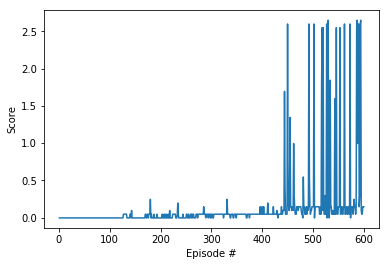

In [8]:
scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()